## NOTEBOOK IMPORTS

In [1]:
# Data Analysis
import pandas as pd
from pandas import DataFrame
import numpy as np

import os
from os.path import join
from os import walk

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural Language Processing
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Image Processing
from PIL import Image

# Web Page Scrapping (HTML)
from bs4 import BeautifulSoup

# Linear Regression 
from sklearn.model_selection import train_test_split

## CONSTANTS

In [111]:
SPAM_1_DATA = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_DATA = './SpamData/01_Processing/spam_assassin_corpus/spam_2'

HAM_1_DATA = './SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
HAM_2_DATA = './SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

PATH = './SpamData/01_Processing/practice_email.txt'
EMAIL_DATA_JASON = './SpamData/01_Processing/email-data.jason'
VOCAB_TO_CSV = './SpamData/01_Processing/vocab-words.csv'

TRAINING_DATA_FILE = './SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = './SpamData/02_Training/test-data.txt'

WHALE_ICON = './SpamData/01_Processing/wordcloud_resources/whale-icon.png'
THUMBS_UP_ICON = './SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_ICON = './SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
SKULL_ICON = './SpamData/01_Processing/wordcloud_resources/skull-icon.png'

FONT_FILE = './SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

In [3]:
mail = open(PATH)

lines = []
is_body = False

for line in mail:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

email = '\n'.join(lines)

In [4]:
def generate(path):
    for dirpath, dirname, filenames in walk(path):
        for filename in filenames:
            file_path = join(dirpath, filename)
            mail = open(file_path, encoding='latin-1')
            
            lines = []
            is_body = False

            for line in mail:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True
            mail.close()

            email = '\n'.join(lines)
            
            yield email, filename

In [5]:
def generate_df(path, classification):
    rows = []
    row_names = []
    
    for email, filename in generate(path):
        rows.append({'MESSAGE': email, 'CATEGORY': classification})
        row_names.append(filename)
        
    return DataFrame(rows, index=row_names)

In [6]:
# Spam emails to Pandas DataFrame
spam_emails = generate_df(SPAM_1_DATA, classification=SPAM_CAT)
spam_emails = spam_emails.append(generate_df(SPAM_2_DATA, classification=SPAM_CAT))

# Non-spam Emails to Pandas DataFrame
ham_emails = generate_df(HAM_1_DATA, classification=HAM_CAT)
ham_emails = ham_emails.append(generate_df(HAM_2_DATA, classification=HAM_CAT))

## LOCATE EMAIILS

In [7]:
data = pd.concat([spam_emails, ham_emails])

In [8]:
(data.MESSAGE.str.len() == 0).sum()

3

In [9]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [10]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

## REMOVE SYSTEM FILE ENTRIES FROM DATAFRAME

In [11]:
data.drop(['cmds'], inplace=True)
document_id = range(0, len(data))

In [12]:
data['FILE_NAME'] = data.index
data['DOC_ID'] = document_id
data.set_index('DOC_ID', inplace=True)

In [13]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


## SAVE DATA TO FILE USING PANDAS

In [14]:
data.to_json(EMAIL_DATA_JASON)

In [15]:
file = pd.read_json(EMAIL_DATA_JASON)
file.head()

,MESSAGE,CATEGORY,FILE_NAME
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


## NUMBER OF SPAM MESSAGES VISUALIZED (Pie Chart)

In [16]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [17]:
amount_spam = data.CATEGORY.value_counts()[1]
amount_ham = data.CATEGORY.value_counts()[0]

category_names = ['Spam', 'Legit Emails']
sizes = [amount_spam, amount_ham]

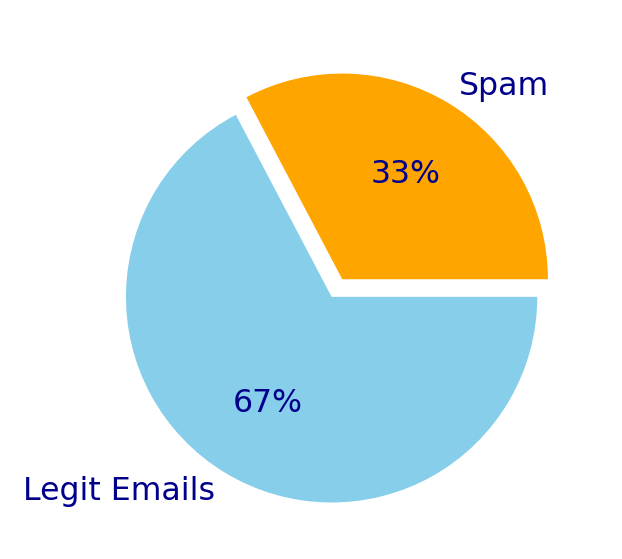

In [18]:
plt.figure(figsize=[3, 3], dpi=227)
plt.pie(sizes, labels=category_names, textprops={'color':'darkblue', 'fontsize':10}, explode=[0, 0.1], 
                                autopct='%1.0f%%', colors=['orange', 'skyblue'])

plt.show()

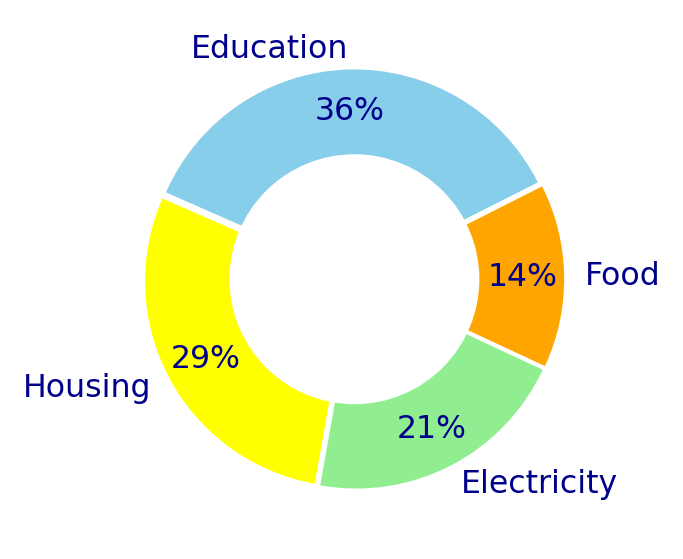

In [19]:
categories = ['Food', 'Education', 'Housing', 'Electricity']
all_sizes = [20, 50, 40, 29]
plt.figure(figsize=[3, 3], dpi=227)
plt.pie(all_sizes, labels=categories, textprops={'color':'darkblue', 'fontsize':10}, autopct='%1.0f%%', 
        explode=[0.02, 0.02, 0.02, 0.02], colors=['orange', 'skyblue', 'yellow', 'lightgreen'], pctdistance=0.8, startangle=-25)

center_circle = plt.Circle((0, 0), radius=0.6, color='white', )
plt.gca().add_artist(center_circle)

plt.show()

## NATURAL LANGUAGE PROCESSING
## WORD TOKENIZE

In [20]:
text = 'All Work and no play makes Jack a Dull boy...To be or not to be'

word_tokenize(text.lower())

['all',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jack',
 'a',
 'dull',
 'boy',
 '...',
 'to',
 'be',
 'or',
 'not',
 'to',
 'be']

## DOWNLOADS

In [21]:
nltk.download('gutenberg')

[nltk_data] Error loading gutenberg: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## REMOVING STOP WORDS

In [22]:
text = 'All Work and no play makes Jack a Dull boy...To be or not to be'
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
        
filtered_words

['work', 'play', 'makes', 'jack', 'dull', 'boy', '...']

## WORD STEMS AND STEMMING

In [23]:
text = 'All Work and no play makes Jack a Dull boy...To be or not to be'
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())

# Word Stemmer
stemmer = PorterStemmer()

filtered_words = []

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
filtered_words

['work', 'play', 'make', 'jack', 'dull', 'boy', '...']

## REMOVING PUNCTUATION

In [24]:
text = 'All Work and no play makes Jack a Dull boy!!!, To be or not to be....is it not Right ???'
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())

# Word Stemmer
stemmer = PorterStemmer()

filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
        
filtered_words

['work', 'play', 'make', 'jack', 'dull', 'boy', 'right']

In [25]:
data.at[3, 'MESSAGE']

"##################################################\n\n#                                                #\n\n#                 Adult Club                     #\n\n#           Offers FREE Membership               #\n\n#                                                #\n\n##################################################\n\n\n\n>>>>>  INSTANT ACCESS TO ALL SITES NOW\n\n>>>>>  Your User Name And Password is.\n\n>>>>>  User Name: zzzz@spamassassin.taint.org\n\n>>>>>  Password: 760382\n\n\n\n5 of the Best Adult Sites on the Internet for FREE!\n\n---------------------------------------\n\nNEWS 08/18/02\n\nWith just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New\n\nMembers. Are you one of them yet???\n\n---------------------------------------\n\nOur Membership FAQ\n\n\n\nQ. Why are you offering free access to 5 adult membership sites for free?\n\nA. I have advertisers that pay me for ad space so you don't have to pay for membership.\n\n\n\nQ. Is it true m

## REMOVING HTML TAGS FROM EMAILS

In [26]:
soup = BeautifulSoup(data.at[5, 'MESSAGE'], 'html.parser')
print(soup.prettify())

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 I'm a single mother in FL and I've received 12,000 in the last 4 days. D. S. in FL

I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day! L.L. in KY

I didn't have the money, so I found myself a partner to work this with. We have received $4,

In [27]:
soup.get_text()

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

## FUNCTIONS FOR EMAIL PROCESSING

In [28]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=stopwords.words('english')):
    
    filtered_words = []
    
    words = word_tokenize(message.lower())
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

len(clean_message(data.at[30, 'MESSAGE']))

312

In [29]:
def clean_html_message(message, stemmer=PorterStemmer(), stop_words=stopwords.words('english')):
    
    # REMOVE HTML TAGS
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_message = soup.get_text()
        
    # CONVERT TO LOWERCASE AND SPLITS INDIVIDUAL WORDS
    words = word_tokenize(cleaned_message.lower())
    
    # LIST OF FILTERED WORDS
    filtered_words = []
    
    for word in words:
        # REMOVE STOP WORDS AND PUNCTUATION
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

clean_message(data.at[30, 'MESSAGE'])

['supplier',
 'comput',
 'printer',
 'etc',
 'consum',
 'central',
 'data',
 'suppli',
 'middleton',
 'road',
 'banburi',
 'oxon',
 'tel',
 'fax',
 'est',
 'good',
 'afternoon',
 'pleas',
 'find',
 'price',
 'specif',
 'laptop',
 'current',
 'avail',
 'stock',
 'immedi',
 'despatch',
 'ibm',
 'thinkpad',
 'laptop',
 'comput',
 'stock',
 'ref',
 'intel',
 'pentium',
 'processor',
 'ram',
 'hard',
 'drive',
 'tft',
 'display',
 'sound',
 'speaker',
 'modem',
 'drive',
 'intern',
 'floppi',
 'drive',
 'month',
 'warranti',
 'ibm',
 'thinkpad',
 'laptop',
 'comput',
 'stock',
 'ref',
 'intel',
 'pentium',
 'processor',
 'ram',
 'hard',
 'drive',
 'tft',
 'display',
 'sound',
 'speaker',
 'modem',
 'drive',
 'intern',
 'floppi',
 'drive',
 'month',
 'warranti',
 'ibm',
 'thinkpad',
 'laptop',
 'comput',
 'stock',
 'ref',
 'intel',
 'pentium',
 'processor',
 'ram',
 'hard',
 'drive',
 'tft',
 'display',
 'usb',
 'irda',
 'sound',
 'speaker',
 'intern',
 'modem',
 'drive',
 'intern',
 'floppi

## APPLYING CLEANING AND TOKENIZATION TO ALL EMAIL MESSAGES
### SLICING DATAFRAMES AND SERIES & CREATING SUBSETS

In [30]:
data.iat[1, 0]

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?ilug@linux.ie%7C17%7C114258\n\n\n\n\n\n-- \n\nIrish Linux Users' Group: ilug@linux.ie\n\nhttp://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.\n\nList maintainer: listmaster@linux.ie\n\n\n"

In [31]:
data.iloc[0:4]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724


In [32]:
data.MESSAGE.iloc[0:3]

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

In [33]:
first_emails = data.MESSAGE.iloc[0:5]
nested_list = first_emails.apply(clean_message)

flat_list = [word for words in nested_list for word in words]
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [34]:
%%time

# APPLY TO ALL MESSAGES IN THE DATA FRAME
nested_list = data.MESSAGE.apply(clean_html_message)

C:\Users\Engr Shoayb\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Wall time: 1min 35s


In [35]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

## USING LOGIC TO SLICE DATA FRAMES

In [36]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [37]:
data[data.CATEGORY == 1].tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
1891,"<html>\n\n<head>\n\n<meta http-equiv=""content-...",1,01396.e80a10644810bc2ae3c1b58c5fd38dfa
1892,This is a multi-part message in MIME format.\n...,1,01397.f75f0dd0dd923faefa3e9cc5ecb8c906
1893,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1,01398.8ca7045aae4184d56e8509dc5ad6d979
1894,****Mid-Summer Customer Appreciation SALE!****...,1,01399.2319643317e2c5193d574e40a71809c2
1895,ATTN:SIR/MADAN \n\n\n\n ...,1,01400.b444b69845db2fa0a4693ca04e6ac5c5


In [38]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

In [39]:
doc_ids_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

## SUBSETTING A SERIES WITH AN INDEX

In [40]:
type(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [41]:
type(nested_list)

pandas.core.series.Series

In [42]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [43]:
nested_list_ham.shape

(3900,)

In [44]:
nested_list_ham.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [45]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [46]:
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [47]:
spam_words = [word for words in nested_list_spam for word in words]
pd.Series(spam_words).value_counts().iloc[:10]

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
dtype: int64

In [48]:
len(spam_words)

317499

In [49]:
normal_words = [word for words in nested_list_ham for word in words]
pd.Series(normal_words).value_counts().iloc[:10]

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
dtype: int64

In [50]:
  len(normal_words)

442061

## CREATING A WORD CLOUD

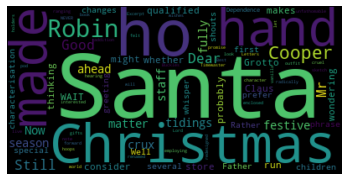

In [51]:
word_cloud = WordCloud().generate(email)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
example_corpora = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpora)

260819

In [53]:
new_words = [''.join(x) for x in example_corpora]

In [54]:
word_novel = ' '.join(new_words)

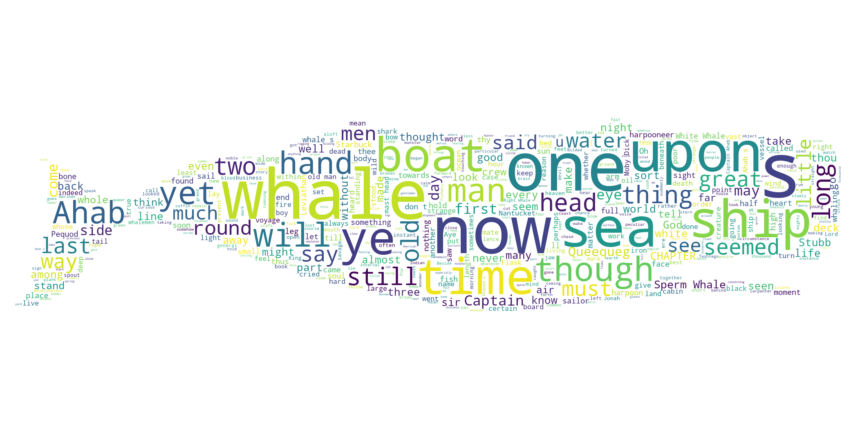

In [55]:
icon = Image.open(WHALE_ICON)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_words=500).generate(word_novel)
plt.figure(figsize=[15, 9])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

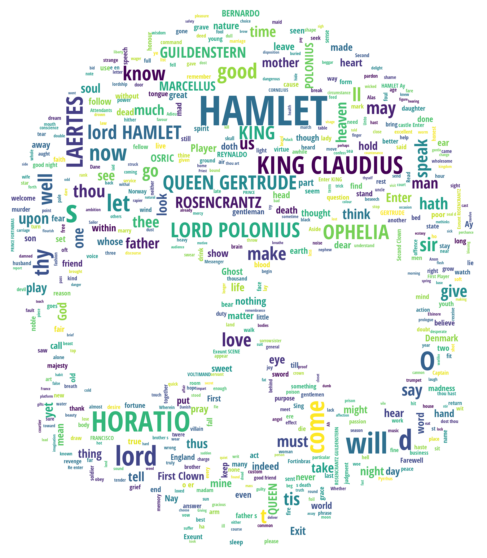

In [56]:
new_corpora = nltk.corpus.shakespeare.words('hamlet.xml')
hamlet = [''.join(i) for i in new_corpora]
word_hamlet = ' '.join(hamlet)

skull_icon = Image.open(SKULL_ICON)
skull_image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255, 255, 255))
skull_image_mask.paste(skull_icon, box=skull_icon)

rgb_array = np.array(skull_image_mask)

skull_word_cloud = WordCloud(font_path=FONT_FILE, mask=rgb_array, background_color='white', max_words=600).generate(word_hamlet)
plt.figure(figsize=[20, 10])
plt.imshow(skull_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## WORD CLOUD FOR SPAM AND NON-SPAM WORDS

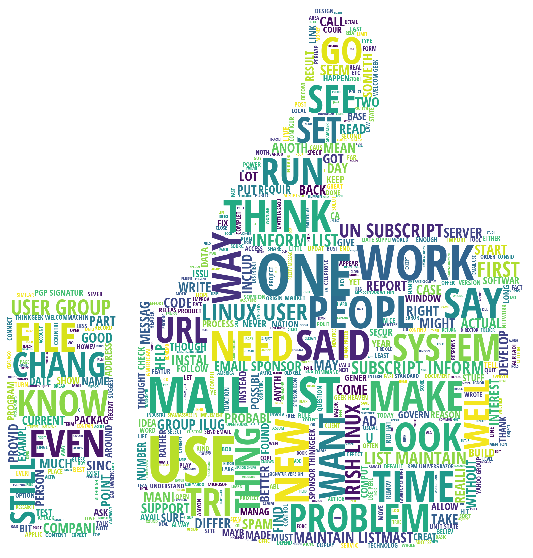

In [57]:
ham_wordcloud =  ' '.join(normal_words)

thumbs_up_icon = Image.open(THUMBS_UP_ICON)
thumbs_up_mask = Image.new(mode='RGB', size=thumbs_up_icon.size, color=(255, 255, 255))
thumbs_up_mask.paste(thumbs_up_icon, box=thumbs_up_icon)

rgb_array = np.array(thumbs_up_mask)

ham_word_cloud = WordCloud(font_path=FONT_FILE, mask=rgb_array, background_color='white', max_words=600)
ham_word_cloud.generate(ham_wordcloud.upper())

plt.figure(figsize=[20, 10])
plt.imshow(ham_word_cloud, interpolation='nearest')
plt.axis('off')
plt.show()

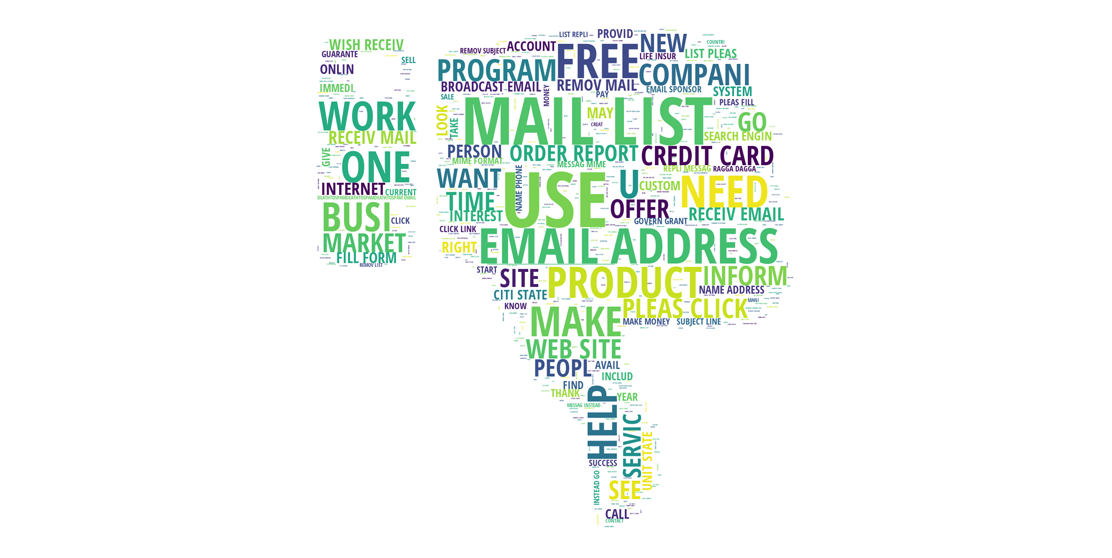

In [58]:
spam_wordcloud =  ' '.join(spam_words)

thumbs_down_icon = Image.open(THUMBS_DOWN_ICON)
thumbs_down_mask = Image.new(mode='RGB', size=thumbs_down_icon.size, color=(255, 255, 255))
thumbs_down_mask.paste(thumbs_down_icon, box=thumbs_down_icon)

rgb_array = np.array(thumbs_down_mask)

spam_word_cloud = WordCloud(font_path=FONT_FILE, mask=rgb_array, background_color='white', max_words=600)
spam_word_cloud.generate(spam_wordcloud.upper())

plt.figure(figsize=[20, 10])
plt.imshow(spam_word_cloud, interpolation='spline16')
plt.axis('off')
plt.show()

## GENERATE VOCABULARY AND DICTIONARY

In [59]:
stemmed_nested_list = data.MESSAGE.apply(clean_html_message)
flat_nested_list = [item for items in stemmed_nested_list for item in items]

C:\Users\Engr Shoayb\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [60]:
unique_words = pd.Series(flat_nested_list).value_counts()
print('Number of Unique Words: ', unique_words.shape[0])
unique_words.head()

Number of Unique Words:  27334


http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [61]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('MOST FREQUENT WORDS: \n', frequent_words[:10])

MOST FREQUENT WORDS: 
 http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64


## CREATE A VOCABULARY DATAFRAME WITH WORD_ID

In [62]:
word_id = list(range(VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORDS': frequent_words.index}, index=word_id)
vocab.index.name = 'WORD_ID'

In [63]:
vocab.head()

,VOCAB_WORDS
WORD_ID,
0,http
1,use
2,list
3,email
4,get


## SAVE THE VOCABULARY AS A CSV FILE

In [64]:
vocab.to_csv(VOCAB_TO_CSV, index_label=vocab.index.name, header=vocab.VOCAB_WORDS.name)

In [65]:
(vocab.VOCAB_WORDS == 'app').any()

True

## FINDING THE EMAIL WITH MOST NUMBER OF WORDS AND EMAIL LOCATION

In [66]:
number_of_words = [len(x) for x in nested_list]

In [67]:
pd.Series(number_of_words).max()

7671

In [68]:
# EMAIL LOCATION
np.argmax(number_of_words)

5775

In [69]:
# EMAIL POSITION 
data.at[np.argmax(number_of_words), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

## GENERATING FEATURES AND SPARSE MATRIX
### Creating a DataFrame with one word per Column

In [70]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [71]:
word_columns_df.shape

(5796, 7671)

## SPLITTING THE DATA INTO TRAINING AND TESTING DATASET

In [72]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, test_size=0.3, random_state=42 )

In [73]:
len(X_train)/len(word_columns_df)

0.6999654934437544

In [74]:
print('Number of Training Samaples:', X_train.shape[0])
print('Fraction of Training Set:', X_train.shape[0]/word_columns_df.shape[0])

Number of Training Samaples: 4057
Fraction of Training Set: 0.6999654934437544


In [75]:
X_train.index.name = X_test.index.name = 'DOC_ID'

In [76]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,url,http,date,tue,sep,gmt,wire,urgent,busi,proposit,...,None,None,None,None,None,None,None,None,None,None
5191,wander,uppsala,sweden,last,week,ran,across,keramik,studio,paula,...,None,None,None,None,None,None,None,None,None,None
5226,pm,win,trees,wrote,actual,easi,test,experiment,compar,result,...,None,None,None,None,None,None,None,None,None,None


In [77]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

## CREATE A SPARSE MATRIX FOR THE TRAINING DATA

In [78]:
word_index = pd.Index(vocab.VOCAB_WORDS)
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'contest', 'fashion', 'render', 'maxaman', 'elig', 'anthoni', 'manner',
       'palm', 'liquid', 'disrupt'],
      dtype='object', name='VOCAB_WORDS', length=2500)

In [79]:
word_index.get_loc('origin')

273

In [80]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [81]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

In [82]:
def make_sparse_matrix(df, indexed_words, labels):
    '''
    RETURNS SPARSE MATRIX AS DATAFRAME
    
    df: A DataFrame with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words odered by word id
    labels: category as a Series (y_train, y_test)
    
    '''
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            word = df.iat[i, j]
            
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 'OCCURANCE': 1, 'WORD_ID': word_id}
                dict_list.append(item)
                
                
    
    return DataFrame(dict_list)

## SPARSE MATRIX FOR TRAINING DATA

In [85]:
# CREATING SPARSE MATRIX  
%%time
sparse_train_matrix = make_sparse_matrix(X_train, word_index, y_train)

In [90]:
sparse_train_matrix.shape

(429221, 4)

In [91]:
sparse_train_matrix.head()

,LABEL,DOC_ID,OCCURANCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1239
2,0,4844,1,503
3,0,4844,1,308
4,0,4844,1,254


## COMBINE OCCURANCES WITH groupby() METHOD

In [126]:
train_grouped = sparse_train_matrix.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURANCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1

In [127]:
train_grouped.shape

(258361, 1)

In [93]:
vocab.at[3, 'VOCAB_WORDS']

'email'

In [94]:
data.MESSAGE[3]

"##################################################\n\n#                                                #\n\n#                 Adult Club                     #\n\n#           Offers FREE Membership               #\n\n#                                                #\n\n##################################################\n\n\n\n>>>>>  INSTANT ACCESS TO ALL SITES NOW\n\n>>>>>  Your User Name And Password is.\n\n>>>>>  User Name: zzzz@spamassassin.taint.org\n\n>>>>>  Password: 760382\n\n\n\n5 of the Best Adult Sites on the Internet for FREE!\n\n---------------------------------------\n\nNEWS 08/18/02\n\nWith just over 2.9 Million Members that signed up for FREE, Last month there were 721,184 New\n\nMembers. Are you one of them yet???\n\n---------------------------------------\n\nOur Membership FAQ\n\n\n\nQ. Why are you offering free access to 5 adult membership sites for free?\n\nA. I have advertisers that pay me for ad space so you don't have to pay for membership.\n\n\n\nQ. Is it true m

In [172]:
# REPEAT THE DOC_ID IN EVERY SINGLE ROW
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURANCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1


In [173]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURANCE
258356,5795,2036,0,1
258357,5795,2040,0,2
258358,5795,2272,0,1
258359,5795,2343,0,1
258360,5795,2368,0,1


In [99]:
vocab.at[2040, 'VOCAB_WORDS']

'swap'

In [102]:
data.MESSAGE[5795]

"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

In [103]:
'swap' in set(stemmed_nested_list[5795])

True

In [104]:
train_grouped.shape

(258361, 4)

## SAVE TRAINING DATA AS .txt FILE

In [105]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [108]:
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURANCE'], dtype='object')

## SPARSE MATRIX FOR TEST DATA

In [110]:
# GENERATING SPARSE MATRIX DATA FRAME FOR TEST DATA
%%time
sparse_test_data = make_sparse_matrix(X_test, word_index, y_test)

In [112]:
sparse_test_data.head()

,LABEL,DOC_ID,OCCURANCE,WORD_ID
0,0,4675,1,89
1,0,4675,1,299
2,0,4675,1,543
3,0,4675,1,84
4,0,4675,1,467


In [117]:
sparse_test_data.shape

(203388, 4)

In [128]:
sparse_test_data = sparse_test_data.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
sparse_test_data.head()

,DOC_ID,WORD_ID,LABEL,OCCURANCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [130]:
sparse_test_data.tail()

,DOC_ID,WORD_ID,LABEL,OCCURANCE
117776,5793,2326,0,2
117777,5793,2352,0,1
117778,5793,2364,0,4
117779,5793,2394,0,3
117780,5793,2486,0,1


In [131]:
word_index[2364]

'spambay'

## SAVE TEST DATA AS .txt FILE

In [133]:
np.savetxt(TEST_DATA_FILE, sparse_test_data, fmt='%d')

## PRE-PROCESSING SUBTLETIES
We started with 5796 Emails. We split it into 4057 emails for training and 1739 emails for testing. 

How many individual emails were included in the testing .txt file ? 
Count the number of in the test_grouped DataFrame. 
After spitting and shuffling our data, How many emails were included in X_test DataFrame ? Is the Number same ?
If not, which emails were excluded and why ? 

Compare the DOC_ID and find out.

In [184]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(sparse_test_data.DOC_ID)

In [180]:
len(train_doc_ids)

4013

In [181]:
len(X_test)

1739

In [191]:
set(X_test.index.values) - test_doc_ids

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [194]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [196]:
data.loc[134]

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [200]:
clean_message(data.MESSAGE[134])

[]